In [ ]:
from tf_model.wisesty import bigru, bilstm
from run_baseline_kmer import default_kmer_embedding_matrix

bigru_model = bigru(window_size=510, num_classes=8, embedding_matrix=default_kmer_embedding_matrix)
bilstm_model = bilstm(window_size=510, num_classes=8, embedding_matrix=default_kmer_embedding_matrix)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

work_dir = os.path.join("run", "baseline", "basic") # change this to another folder name.
log_dir = os.path.join(work_dir, "log")

bilstm_log_file = "log.bilstm.csv"
bigru_log_file = "log.bigru.csv"

bilstm_df = pd.read_csv(
    os.path.join(log_dir, bilstm_log_file)
)

bigru_df = pd.read_csv(
    os.path.join(log_dir, bigru_log_file)
)

default_figsize = (8, 5)

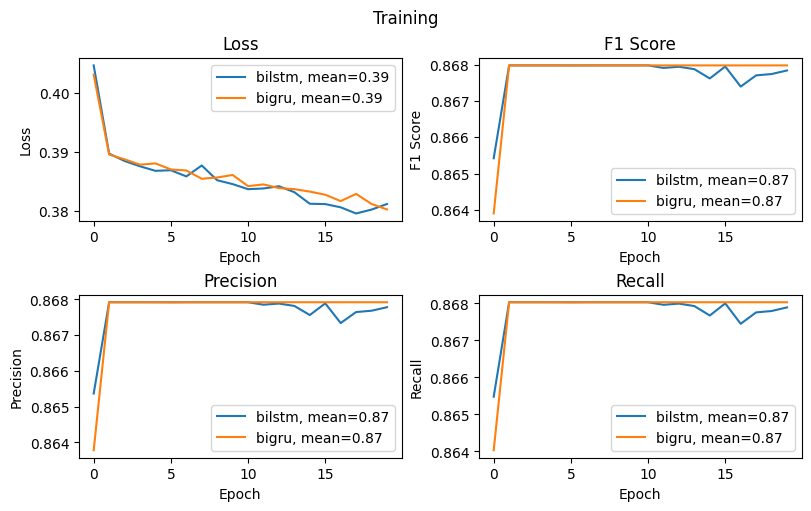

In [13]:
xs = [i for i in range(20)]
figs, axes = plt.subplots(nrows=2, ncols=2, constrained_layout=True, figsize=default_figsize)

# loss
axes[0][0].plot(
    xs,
    bilstm_df["loss"].values,
    label=f"bilstm, mean={round(np.average(bigru_df['loss'].values), 2)}"
)
axes[0][0].plot(
    xs,
    bigru_df["loss"].values,
    label=f"bigru, mean={round(np.average(bigru_df['loss'].values), 2)}"
)
axes[0][0].set(xlabel="Epoch", ylabel="Loss", title="Loss")
axes[0][0].legend()

# f1 score
axes[0][1].plot(
    xs,
    bilstm_df["f1_score"].values,
    label=f"bilstm, mean={round(np.average(bilstm_df['f1_score'].values), 2)}"
)
axes[0][1].plot(
    xs,
    bigru_df["f1_score"].values,
    label=f"bigru, mean={round(np.average(bigru_df['f1_score'].values), 2)}"
)
axes[0][1].set(xlabel="Epoch", ylabel="F1 Score", title="F1 Score")
axes[0][1].legend()

# precision
axes[1][0].plot(
    xs,
    bilstm_df["precision"].values,
    label=f"bilstm, mean={round(np.average(bilstm_df['precision'].values), 2)}"
)
axes[1][0].plot(
    xs,
    bigru_df["precision"].values,
    label=f"bigru, mean={round(np.average(bigru_df['precision'].values), 2)}"
)
axes[1][0].set(xlabel="Epoch", ylabel="Precision", title="Precision")
axes[1][0].legend()

# recall
axes[1][1].plot(
    xs,
    bilstm_df["recall"].values,
    label=f"bilstm, mean={round(np.average(bilstm_df['recall'].values), 2)}"
)
axes[1][1].plot(
    xs,
    bigru_df["recall"].values,
    label=f"bigru, mean={round(np.average(bigru_df['recall'].values), 2)}"
)
axes[1][1].set(xlabel="Epoch", ylabel="Recall", title="Recall")
axes[1][1].legend()


plt.suptitle("Training")
plt.show()

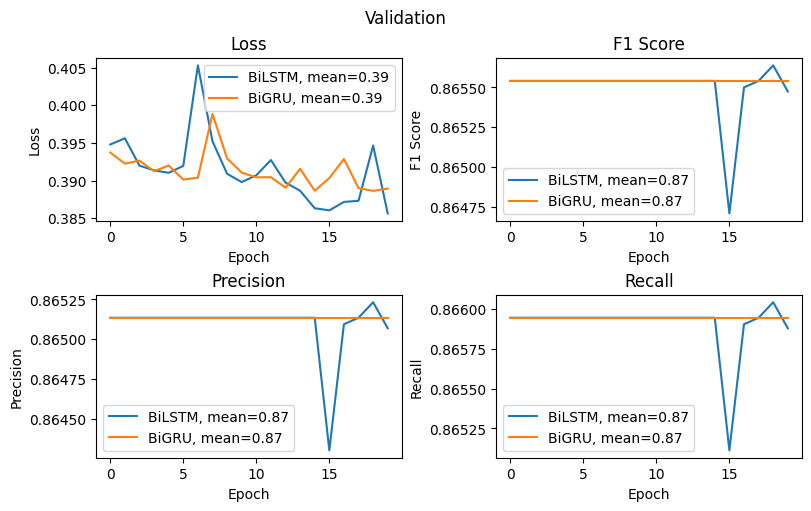

In [15]:
xs = [i for i in range(20)]
figs, axes = plt.subplots(nrows=2, ncols=2, constrained_layout=True, figsize=default_figsize)

# loss
axes[0][0].plot(
    xs,
    bilstm_df["val_loss"].values,
    label=f"BiLSTM, mean={round(np.average(bilstm_df['val_loss'].values), 2)}"
)
axes[0][0].plot(
    xs,
    bigru_df["val_loss"].values,
    label=f"BiGRU, mean={round(np.average(bigru_df['val_loss'].values), 2)}"
)
axes[0][0].set(xlabel="Epoch", ylabel="Loss", title="Loss")
axes[0][0].legend()

# f1 score
axes[0][1].plot(
    xs,
    bilstm_df["val_f1_score"].values,
    label=f"BiLSTM, mean={round(np.average(bilstm_df['val_f1_score'].values), 2)}"
)
axes[0][1].plot(
    xs,
    bigru_df["val_f1_score"].values,
    label=f"BiGRU, mean={round(np.average(bigru_df['val_f1_score'].values), 2)}"
)
axes[0][1].set(xlabel="Epoch", ylabel="F1 Score", title="F1 Score")
axes[0][1].legend()

# precision
axes[1][0].plot(
    xs,
    bilstm_df["val_precision"].values,
    label=f"BiLSTM, mean={round(np.average(bilstm_df['val_precision'].values), 2)}"
)
axes[1][0].plot(
    xs,
    bigru_df["val_precision"].values,
    label=f"BiGRU, mean={round(np.average(bigru_df['val_precision'].values), 2)}"
)
axes[1][0].set(xlabel="Epoch", ylabel="Precision", title="Precision")
axes[1][0].legend()

# recall
axes[1][1].plot(
    xs,
    bilstm_df["val_recall"].values,
    label=f"BiLSTM, mean={round(np.average(bilstm_df['val_recall'].values), 2)}"
)
axes[1][1].plot(
    xs,
    bigru_df["val_recall"].values,
    label=f"BiGRU, mean={round(np.average(bigru_df['val_recall'].values), 2)}"
)
axes[1][1].set(xlabel="Epoch", ylabel="Recall", title="Recall")
axes[1][1].legend()


plt.suptitle("Validation")
plt.show()

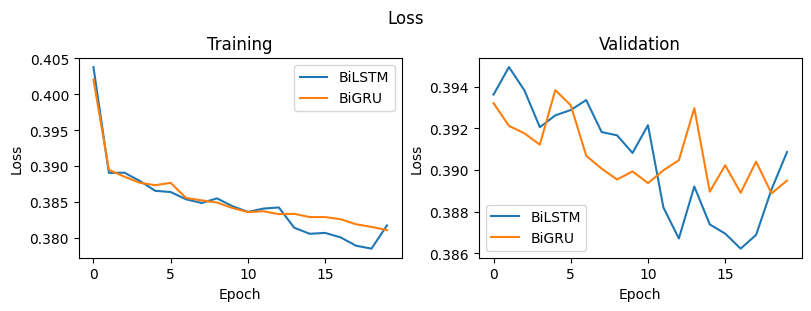

In [36]:
xs = [i for i in range(20)]
figs, axes = plt.subplots(nrows=1, ncols=2, constrained_layout=True, figsize=(8, 3))

# loss
axes[0].plot(
    xs,
    bilstm_df["loss"].values,
    label="BiLSTM"
)
axes[0].plot(
    xs,
    bigru_df["loss"].values,
    label="BiGRU"
)
axes[0].set(xlabel="Epoch", ylabel="Loss", title="Training")
axes[0].legend()

# loss
axes[1].plot(
    xs,
    bilstm_df["val_loss"].values,
    label="BiLSTM"
)
axes[1].plot(
    xs,
    bigru_df["val_loss"].values,
    label="BiGRU"
)
axes[1].set(xlabel="Epoch", ylabel="Loss", title="Validation")
axes[1].legend()

plt.suptitle("Loss")
plt.show()

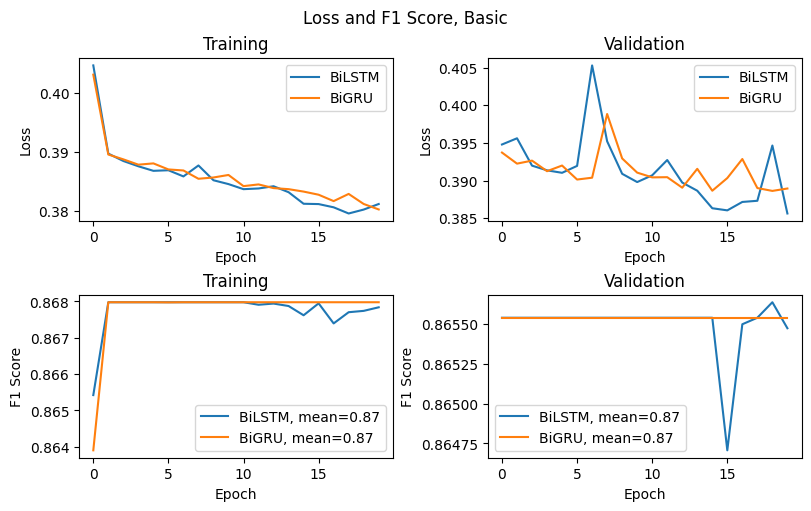

In [13]:
import math

xs = [i for i in range(20)]
figs, axes = plt.subplots(nrows=2, ncols=2, constrained_layout=True, figsize=(8, 5))

# loss
axes[0][0].plot(
    xs,
    bilstm_df["loss"].values,
    label="BiLSTM"
)
axes[0][0].plot(
    xs,
    bigru_df["loss"].values,
    label="BiGRU"
)
axes[0][0].set(xlabel="Epoch", ylabel="Loss", title="Training")
axes[0][0].legend()

# loss
axes[0][1].plot(
    xs,
    bilstm_df["val_loss"].values,
    label="BiLSTM"
)
axes[0][1].plot(
    xs,
    bigru_df["val_loss"].values,
    label="BiGRU"
)
axes[0][1].set(xlabel="Epoch", ylabel="Loss", title="Validation")
axes[0][1].legend()


# train f1 score
axes[1][0].plot(
    xs,
    bilstm_df["f1_score"].values,
    label=f"BiLSTM, mean={round(np.average(bilstm_df['f1_score'].values), 2)}"
)
axes[1][0].plot(
    xs,
    bigru_df["f1_score"].values,
    label=f"BiGRU, mean={round(np.average(bigru_df['f1_score'].values), 2)}"
)
axes[1][0].set(xlabel="Epoch", ylabel="F1 Score", title="Training")
axes[1][0].legend()

# f1 score
axes[1][1].plot(
    xs,
    bilstm_df["val_f1_score"].values,
    label=f"BiLSTM, mean={round(np.average(bilstm_df['val_f1_score'].values), 2)}"
)
axes[1][1].plot(
    xs,
    bigru_df["val_f1_score"].values,
    label=f"BiGRU, mean={round(np.average(bigru_df['val_f1_score'].values), 2)}"
)
axes[1][1].set(xlabel="Epoch", ylabel="F1 Score", title="Validation")
axes[1][1].legend()

plt.suptitle("Loss and F1 Score, Basic")
plt.show()

In [15]:
import os
import pandas as pd
kmer_log_dir = os.path.join("run", "baseline", "kmer", "log")
kmer_bilstm_df = pd.read_csv(os.path.join(kmer_log_dir, "log.bilstm.csv"))
kmer_bigru_df = pd.read_csv(os.path.join(kmer_log_dir, "log.bigru.csv"))

basic_log_dir = os.path.join("run", "baseline", "basic", "log")
basic_bilstm_df = pd.read_csv(os.path.join(basic_log_dir, "log.bilstm.csv"))
basic_bigru_df =  pd.read_csv(os.path.join(basic_log_dir, "log.bigru.csv"))

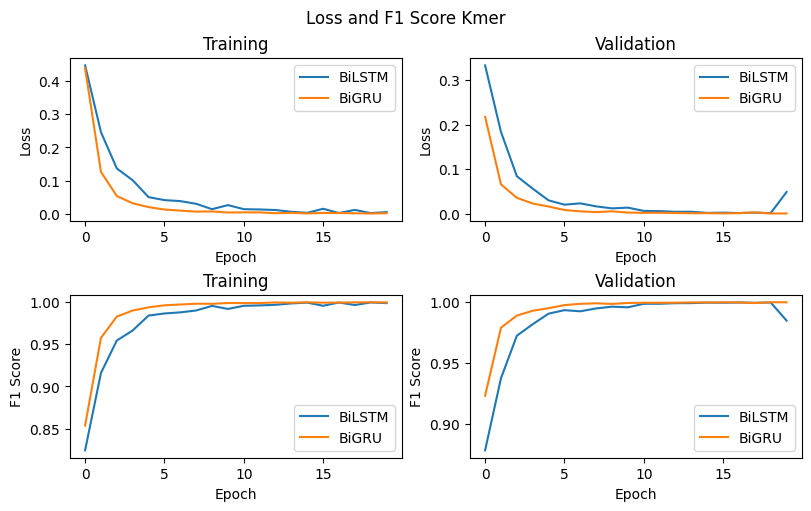

In [20]:
xs = [i for i in range(20)]
figs, axes = plt.subplots(nrows=2, ncols=2, constrained_layout=True, figsize=(8, 5))

# train loss
axes[0][0].plot(
    xs,
    kmer_bilstm_df["loss"].values,
    label="BiLSTM"
)
axes[0][0].plot(
    xs,
    kmer_bigru_df["loss"].values,
    label="BiGRU"
)
axes[0][0].set(xlabel="Epoch", ylabel="Loss", title="Training")
axes[0][0].legend()

# validation loss
axes[0][1].plot(
    xs,
    kmer_bilstm_df["val_loss"].values,
    label="BiLSTM"
)
axes[0][1].plot(
    xs,
    kmer_bigru_df["val_loss"].values,
    label="BiGRU"
)
axes[0][1].set(xlabel="Epoch", ylabel="Loss", title="Validation")
axes[0][1].legend()


# train f1 score
axes[1][0].plot(
    xs,
    kmer_bilstm_df["f1_score"].values,
    label="BiLSTM"
)
axes[1][0].plot(
    xs,
    kmer_bigru_df["f1_score"].values,
    label="BiGRU"
)
axes[1][0].set(xlabel="Epoch", ylabel="F1 Score", title="Training")
axes[1][0].legend()

# f1 score
axes[1][1].plot(
    xs,
    kmer_bilstm_df["val_f1_score"].values,
    label="BiLSTM"
)
axes[1][1].plot(
    xs,
    kmer_bigru_df["val_f1_score"].values,
    label="BiGRU"
)
axes[1][1].set(xlabel="Epoch", ylabel="F1 Score", title="Validation")
axes[1][1].legend()

plt.suptitle("Loss and F1 Score Kmer")
plt.show()

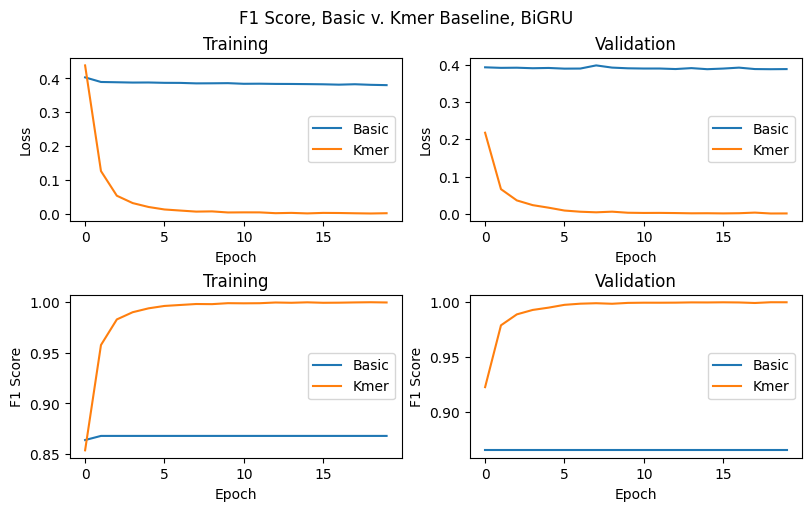

In [17]:
xs = [i for i in range(20)]
figs, axes = plt.subplots(nrows=2, ncols=2, constrained_layout=True, figsize=(8, 5))

# train f1 score
axes[0][0].plot(
    xs,
    bigru_df["loss"].values,
    label="Basic"
)
axes[0][0].plot(
    xs,
    kmer_bigru_df["loss"].values,
    label="Kmer"
)
axes[0][0].set(xlabel="Epoch", ylabel="Loss", title="Training")
axes[0][0].legend()

# f1 score
axes[0][1].plot(
    xs,
    bigru_df["val_loss"].values,
    label="Basic"
)
axes[0][1].plot(
    xs,
    kmer_bigru_df["val_loss"].values,
    label="Kmer"
)
axes[0][1].set(xlabel="Epoch", ylabel="Loss", title="Validation")
axes[0][1].legend()

# train f1 score
axes[1][0].plot(
    xs,
    bigru_df["f1_score"].values,
    label="Basic"
)
axes[1][0].plot(
    xs,
    kmer_bigru_df["f1_score"].values,
    label="Kmer"
)
axes[1][0].set(xlabel="Epoch", ylabel="F1 Score", title="Training")
axes[1][0].legend()

# f1 score
axes[1][1].plot(
    xs,
    bigru_df["val_f1_score"].values,
    label="Basic"
)
axes[1][1].plot(
    xs,
    kmer_bigru_df["val_f1_score"].values,
    label="Kmer"
)
axes[1][1].set(xlabel="Epoch", ylabel="F1 Score", title="Validation")
axes[1][1].legend()

plt.suptitle("F1 Score, Basic v. Kmer Baseline, BiGRU")
plt.show()

## Baseline Kmer Token F1 Scores

In [ ]:
import os
import pandas as pd
kmer_log_dir = os.path.join("run", "baseline", "kmer", "log")
kmer_bilstm_df = pd.read_csv(os.path.join(kmer_log_dir, "log.bilstm.csv"))
kmer_bigru_df = pd.read_csv(os.path.join(kmer_log_dir, "log.bigru.csv"))



